#**LiveStock Production Nepal Analysis**

##Importing Libraries

In [69]:
# Importing necessary libraries
import pandas as pd # for data manipulation
import numpy as np #for performing numeric task in the dataset

import seaborn as sns;  #for visualization and finding the patterns
import matplotlib.pyplot as plt; #for visualization and finding the patterns
import plotly.express as px   #for visulalization and finding the patterns in 3D visualization
import plotly.graph_objects as go  #for visualization and finding the patterns

from sklearn.linear_model import LinearRegression #For performing linear regression
from sklearn.model_selection import train_test_split #For splitting the data into training and testing set

In [70]:
# For mounting the drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Datasets

In [71]:
# Loading dataset from drive and define in df variable


df1 = pd.read_csv('/content/drive/MyDrive/ml/individual/net-meat-production-in-nepal-by-district.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ml/individual/milk-animals-and-milk-production-in-nepal-by-district.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ml/individual/production-of-egg-in-nepal-by-district.csv')
df4 = pd.read_csv('/content/drive/MyDrive/ml/individual/wool-production-in-nepal-by-district.csv')
df5 = pd.read_csv('/content/drive/MyDrive/ml/individual/horseasses-population-in-nepal-by-district.csv')
df6 = pd.read_csv('/content/drive/MyDrive/ml/individual/rabbit-population-in-nepal-by-district.csv')
df7 = pd.read_csv('/content/drive/MyDrive/ml/individual/yak-nak-chauri-population-in-nepal-by-district.csv')
df8 = pd.read_csv('/content/drive/MyDrive/ml/individual/production-of-cotton-in-nepal-by-district.csv')

###For df1


In [72]:
# first five rows
df1.head()

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,607,31,491,443,172,0,1744
1,SANKHUWASABHA,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,1123,28,416,428,166,0,2161
3,E.MOUNTAIN,3376,100,1865,1380,640,1,7362
4,PANCHTHAR,1496,4,940,730,248,1,3419


In [73]:
# info of datset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DISTRICT    96 non-null     object
 1   BUFF        96 non-null     int64 
 2   MUTTON      96 non-null     int64 
 3   CHEVON      96 non-null     int64 
 4   PORK        96 non-null     int64 
 5   CHICKEN     96 non-null     int64 
 6   DUCK MEAT   96 non-null     int64 
 7   TOTAL MEAT  96 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ KB


In [74]:
# numerical description
df1.describe()

,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
count,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,7291.87500,111.833333,2732.625000,979.541667,2293.375000,9.875000,13419.125000
std,19484.37418,314.001598,7245.635676,2713.977477,6645.981822,28.561015,35967.078276
min,0.00000,0.000000,56.000000,1.000000,5.000000,0.000000,78.000000
25%,1438.50000,10.000000,575.000000,114.000000,208.250000,0.000000,2771.000000
50%,2558.00000,31.000000,890.000000,326.000000,489.000000,2.000000,4502.000000
75%,4447.00000,90.750000,1689.500000,711.250000,1615.250000,6.000000,7827.500000
max,175005.00000,2684.000000,65583.000000,23509.000000,55041.000000,237.000000,322059.000000


In [75]:
# checking for duplicate values
df1.duplicated().sum()

0

In [76]:
# checking for null values
df1.isnull().sum()

,0
DISTRICT,0
BUFF,0
MUTTON,0
CHEVON,0
PORK,0
CHICKEN,0
DUCK MEAT,0
TOTAL MEAT,0


In [77]:
# checking for unrealistic values into categorical column
df1['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASABHA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C.REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS', 'NAWALPARASI',
       'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W.REGION', 'DOLPA', 'MUGU',
       'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN', 'RUKUM', 'ROLPA',
       'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'MW.HILLS',
       'DANG', 'BANKE'

In [78]:
#Replace wrong DISTRICT name
df1['DISTRICT'] = df1['DISTRICT'].replace('SANKHUWASABHA', 'SANKHUWASHAVA')

###For df2


In [79]:
# first five rows
df2.head()

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,7819,13501,2948,5493,8441.0
3,E.MOUNTAIN,31284,31855,15324,20339,35663.0
4,PANCHTHAR,14854,11331,8511,9835,18346.0


In [80]:
# info of datset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                96 non-null     object 
 1   MILKING  COWS NO.       96 non-null     int64  
 2   MILKING  BUFFALOES NO.  96 non-null     int64  
 3   COW MILK                96 non-null     int64  
 4   BUFF MILK               96 non-null     int64  
 5   TOTAL MILK PRODUCED     95 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.6+ KB


In [81]:
# numerical description
df2.describe()

,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
count,9.600000e+01,9.600000e+01,96.000000,9.600000e+01,95.000000
mean,4.275562e+04,5.647433e+04,26825.260417,5.043505e+04,58555.189474
std,1.144496e+05,1.508551e+05,71948.998086,1.358044e+05,96696.838132
min,4.520000e+02,0.000000e+00,259.000000,0.000000e+00,259.000000
25%,8.074750e+03,1.020550e+04,4630.750000,9.085000e+03,14179.500000
50%,1.513050e+04,1.954000e+04,8343.500000,1.710250e+04,28027.000000
75%,2.600800e+04,3.674975e+04,15694.000000,3.110500e+04,43324.000000
max,1.026135e+06,1.355384e+06,643806.000000,1.210441e+06,536299.000000


In [82]:
# checking for duplicate values
df2.duplicated().sum()

0

In [83]:
# checking for null values
df2.isnull().sum()

,0
DISTRICT,0
MILKING COWS NO.,0
MILKING BUFFALOES NO.,0
COW MILK,0
BUFF MILK,0
TOTAL MILK PRODUCED,1


In [84]:
# checking for unrealistic values into categorical column
df2['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E. REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C. REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA',
       'LAMJUNG', 'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA',
       'MYAGDI', 'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS',
       'NAWALPARASI', 'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W. REGION',
       'DOLPA', 'MUGU', 'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN',
       'RUKUM', 'ROLPA', 'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH',
       'SURKHET', 'MW.HILLS', 'DANG', 'BAN

In [85]:
# renaming rows
condition_e = df2['DISTRICT'] == 'E. REGION'
df2.loc[condition_e, 'DISTRICT'] = 'E.REGION'

condition_c = df2['DISTRICT'] == 'C. REGION'
df2.loc[condition_c, 'DISTRICT'] = 'C.REGION'

condition_w = df2['DISTRICT'] == 'W. REGION'
df2.loc[condition_w, 'DISTRICT'] = 'W.REGION'

condition_mw = df2['DISTRICT'] == 'MW. REGION'
df2.loc[condition_mw, 'DISTRICT'] = 'MW.REGION'

condition_fw = df2['DISTRICT'] == 'FW. REGION'
df2.loc[condition_fw, 'DISTRICT'] = 'FW.REGION'

In [86]:
# removing null values
total_milk_produced_sum = df2['TOTAL MILK PRODUCED'].sum()
df2['TOTAL MILK PRODUCED'].fillna(total_milk_produced_sum, inplace=True)

### For df3

In [87]:
# first five rows
df3.head()

,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,77512.0,465,5506,34,5540
2,SOLUKHUMBU,42671.0,374,2345,28,2373
3,E.MOUNTAIN,135548.0,1180,10271,87,10358
4,PANCHTHAR,63779.0,261,5581,19,5600


In [88]:
# info of datset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DISTRICT     96 non-null     object 
 1   LAYING HEN   96 non-null     float64
 2   LAYING DUCK  96 non-null     int64  
 3   HEN EGG      96 non-null     int64  
 4   DUCK EGG     96 non-null     int64  
 5   TOTAL EGG    96 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.6+ KB


In [89]:
# numerical description
df3.describe()

,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
count,9.600000e+01,96.000000,9.600000e+01,96.000000,9.600000e+01
mean,5.147298e+05,7538.625000,5.392358e+04,579.416667,5.450300e+04
std,1.536131e+06,21446.360692,1.650960e+05,1649.968112,1.665308e+05
min,1.488000e+03,3.000000,2.100000e+02,0.000000,2.110000e+02
25%,3.319350e+04,317.750000,3.060750e+03,24.750000,3.099000e+03
50%,1.113675e+05,1422.500000,7.769500e+03,109.500000,7.978500e+03
75%,3.037330e+05,4475.500000,3.172875e+04,326.250000,3.259750e+04
max,1.235352e+07,180927.000000,1.294166e+06,13906.000000,1.308072e+06


In [90]:
# checking for unrealistic values into categorical column
df3['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C.REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS', 'NAWALPARASI',
       'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W.REGION', 'DOLPA', 'MUGU',
       'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN', 'RUKUM', 'ROLPA',
       'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'MW.HILLS',
       'DANG', 'BANKE'

### For df4

In [91]:
# first five rows
df4.head()

,DISTRICT,SHEEPS NO.,SHEEP WOOL PRODUCED
0,TAPLEJUNG,5777,3519
1,SANKHUWASHAVA,12181,9050
2,SOLUKHUMBU,8461,6286
3,E.MOUNTAIN,26419,18855
4,PANCHTHAR,1338,994


In [92]:
# info of datset
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DISTRICT             96 non-null     object
 1   SHEEPS NO.           96 non-null     int64 
 2   SHEEP WOOL PRODUCED  96 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [93]:
# numerical description
df4.describe()

,SHEEPS NO.,SHEEP WOOL PRODUCED
count,96.000000,96.000000
mean,33360.750000,24514.500000
std,94126.278004,69318.271646
min,36.000000,13.000000
25%,2637.500000,1958.750000
50%,9130.500000,6414.500000
75%,26427.250000,19054.500000
max,800658.000000,588348.000000


In [94]:
# checking for null values
df4.isnull().sum()

,0
DISTRICT,0
SHEEPS NO.,0
SHEEP WOOL PRODUCED,0


In [95]:
# checking for unrealistic values into categorical column
df4['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C.REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS', 'NAWALPARASI',
       'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W.REGION', 'DOLPA', 'MUGU',
       'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN', 'RUKUM', 'ROLPA',
       'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'MW.HILLS',
       'DANG', 'BANKE'

### For df5

In [96]:
# first five rows
df5.head()

,DISTRICT,Horses/Asses
0,TAPLEJUNG,543
1,SANKHUWASHAVA,358
2,SOLUKHUMBU,1775
3,PANCHTHAR,15
4,ILLAM,2815


In [97]:
# info of datset
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DISTRICT      60 non-null     object
 1   Horses/Asses  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [98]:
# numerical description
df5.describe()

,Horses/Asses
count,60.000000
mean,2790.400000
std,8447.864779
min,12.000000
25%,122.250000
50%,493.000000
75%,1510.250000
max,55808.000000


In [99]:
# checking for null values
df5.isnull().sum()

,0
DISTRICT,0
Horses/Asses,0


In [100]:
# checking for unrealistic values into categorical column
df5['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'TERATHUM', 'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR',
       'JHAPA', 'MORANG', 'SUNSARI', 'E.REGION', 'NUWAKOT', 'RAUTAHAT',
       'BARA', 'CHITWAN', 'C.REGION', 'MANANG', 'MUSTANG', 'GORKHA',
       'LAMJUNG', 'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'NAWALPARASI', 'RUPANDEHI',
       'KAPILBASTU', 'W.REGION', 'DOLPA', 'MUGU', 'JUMLA', 'HUMLA',
       'KALIKOT', 'RUKUM', 'ROLPA', 'PYUTHAN', 'SALYAN', 'JAJARKOT',
       'DAILEKH', 'SURKHET', 'DANG', 'BANKE', 'BARDIYA', 'MW.REGION',
       'BAJURA', 'BAJHANG', 'DARCHULA', 'ACHHAM', 'DOTI', 'BAITADI',
       'DADELDHURA', 'FW.REGION', 'Total'], dtype=object)

In [101]:
# renaming column
df5['DISTRICT'] = df5['DISTRICT'].replace('TERATHUM', 'TERHATHUM')
df5['DISTRICT'] = df5['DISTRICT'].replace('Total', 'NEPAL')

### For df6

In [102]:
# first five rows
df6.head()

,DISTRICT,Rabbit
0,TAPLEJUNG,506
1,SANKHUWASHAVA,313
2,SOLUKHUMBU,105
3,PANCHTHAR,29
4,ILLAM,240


In [103]:
# info of datset
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DISTRICT  55 non-null     object
 1   Rabbit    55 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [104]:
# numerical description
df6.describe()

,Rabbit
count,55.000000
mean,1757.072727
std,4684.882317
min,19.000000
25%,179.000000
50%,506.000000
75%,1135.500000
max,32213.000000


In [105]:
# checking for duplicate values
df6.duplicated().sum()

0

In [106]:
# checking for null values
df6.isnull().sum()

,0
DISTRICT,0
Rabbit,0


In [107]:
# checking for unrealistic values into categorical column
df6['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'TERHATHUM', 'DHANKUTA', 'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA',
       'UDAYAPUR', 'JHAPA', 'SUNSARI', 'E.REGION', 'SINDHUPALCHOK',
       'KATHMANDU', 'DHADING', 'KAVRE', 'RASUWA', 'RAMECHHAP',
       'MAKWANPUR', 'BARA', 'C.REGION', 'MANANG', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'NAWALPARASI', 'RUPANDEHI',
       'KAPILBASTU', 'W.REGION', 'DOLPA', 'MUGU', 'JUMLA', 'HUMLA',
       'KALIKOT', 'RUKUM', 'JAJARKOT', 'SURKHET', 'DAILEKH', 'MW.REGION',
       'BAJURA', 'BAJHANG', 'DARCHULA', 'DOTI', 'FW.REGION', 'Total'],
      dtype=object)

In [108]:
# renaming column
df6['DISTRICT'] = df6['DISTRICT'].replace('RAMECHHAP', 'RAMECHAP')
df6['DISTRICT'] = df6['DISTRICT'].replace('Total', 'NEPAL')

### For df7

In [109]:
# first five rows
df7.head()

,DISTRICT,YAK/NAK/CHAURI
0,TAPLEJUNG,3465
1,SANKHUWASHAVA,3945
2,SOLUKHUMBU,12235
3,PANCHTHAR,1075
4,ILLAM,165


In [110]:
# info of datset
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DISTRICT        35 non-null     object
 1   YAK/NAK/CHAURI  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


In [111]:
# numerical description
df7.describe()

,YAK/NAK/CHAURI
count,35.00000
mean,5899.80000
std,12300.08377
min,25.00000
25%,407.00000
50%,1075.00000
75%,5556.00000
max,68831.00000


In [112]:
# checking for duplicate values
df7.duplicated().sum()

0

In [113]:
# checking for null values
df7.isnull().sum()

,0
DISTRICT,0
YAK/NAK/CHAURI,0


In [114]:
# checking for unrealistic values into categorical column
df7['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'RAMECHAP', 'NUWAKOT', 'DHADING',
       'C.REGION', 'MANANG', 'MUSTANG', 'GORKHA', 'LAMJUNG', 'KASKI',
       'MYAGDI', 'W.REGION', 'DOLPA', 'MUGU', 'HUMLA', 'JUMLA', 'KALIKOT',
       'RUKUM', 'MW.REGION', 'BAJURA', 'BAJHANG', 'DARCHULA', 'FW.REGION',
       'Total'], dtype=object)

In [115]:
# renaming
df7['DISTRICT'] = df7['DISTRICT'].replace('Total', 'NEPAL')

### For df8

In [116]:
# first five rows
df8.head()

,DISTRICT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,Dang,106,74,700
1,Banke,27,41,1519
2,Bardiya,10,12,1200
3,NEPAL,143,127,890


In [117]:
# info of datset
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DISTRICT     4 non-null      object
 1   AREA (Ha.)   4 non-null      int64 
 2   PROD. (Mt.)  4 non-null      int64 
 3   YIELD Kg/Ha  4 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 256.0+ bytes


In [118]:
# numerical description
df8.describe()

,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
count,4.000000,4.000000,4.000000
mean,71.500000,63.500000,1077.250000
std,63.416612,49.332207,359.439726
min,10.000000,12.000000,700.000000
25%,22.750000,33.750000,842.500000
50%,66.500000,57.500000,1045.000000
75%,115.250000,87.250000,1279.750000
max,143.000000,127.000000,1519.000000


In [119]:
# checking for duplicate values
df8.duplicated().sum()

0

In [120]:
# renaming
df8['DISTRICT'] = df8['DISTRICT'].str.upper()

## Merge data

In [121]:
common_column = 'DISTRICT' # Ensuring 'DISTRICT' is a common column across all DataFrames.
# Merging multiple DataFrames on the common column 'DISTRICT' using outer joins.
merged_df = pd.merge(df1, df2, on=common_column, how='outer')
merged_df = pd.merge(merged_df, df3, on=common_column, how='outer')
merged_df = pd.merge(merged_df, df4, on=common_column, how='outer')
merged_df = pd.merge(merged_df, df5, on=common_column, how='outer')
merged_df = pd.merge(merged_df, df6, on=common_column, how='outer')
merged_df = pd.merge(merged_df, df7, on=common_column, how='outer')
merged_df = pd.merge(merged_df, df8, on=common_column, how='outer')

In [122]:
#Checking the head
merged_df.head()

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,MILKING COWS NO.,MILKING BUFFALOES NO.,...,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,Horses/Asses,Rabbit,YAK/NAK/CHAURI,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,TAPLEJUNG,607,31,491,443,172,0,1744,8123,4987,...,25,2445,5777,3519,543.0,506.0,3465.0,NaN,NaN,NaN
1,SANKHUWASHAVA,1646,41,958,509,302,1,3457,15342,13367,...,34,5540,12181,9050,358.0,313.0,3945.0,NaN,NaN,NaN
2,SOLUKHUMBU,1123,28,416,428,166,0,2161,7819,13501,...,28,2373,8461,6286,1775.0,105.0,12235.0,NaN,NaN,NaN
3,E.MOUNTAIN,3376,100,1865,1380,640,1,7362,31284,31855,...,87,10358,26419,18855,NaN,NaN,NaN,NaN,NaN,NaN
4,PANCHTHAR,1496,4,940,730,248,1,3419,14854,11331,...,19,5600,1338,994,15.0,29.0,1075.0,NaN,NaN,NaN


In [123]:
#Checking the info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                96 non-null     object 
 1   BUFF                    96 non-null     int64  
 2   MUTTON                  96 non-null     int64  
 3   CHEVON                  96 non-null     int64  
 4   PORK                    96 non-null     int64  
 5   CHICKEN                 96 non-null     int64  
 6   DUCK MEAT               96 non-null     int64  
 7   TOTAL MEAT              96 non-null     int64  
 8   MILKING  COWS NO.       96 non-null     int64  
 9   MILKING  BUFFALOES NO.  96 non-null     int64  
 10  COW MILK                96 non-null     int64  
 11  BUFF MILK               96 non-null     int64  
 12  TOTAL MILK PRODUCED     96 non-null     float64
 13  LAYING HEN              96 non-null     float64
 14  LAYING DUCK             96 non-null     int6

In [124]:
#Checking the null value
merged_df.isnull().sum()

,0
DISTRICT,0
BUFF,0
MUTTON,0
CHEVON,0
PORK,0
CHICKEN,0
DUCK MEAT,0
TOTAL MEAT,0
MILKING COWS NO.,0
MILKING BUFFALOES NO.,0


In [125]:
#Checking unique values
merged_df['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C.REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS', 'NAWALPARASI',
       'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W.REGION', 'DOLPA', 'MUGU',
       'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN', 'RUKUM', 'ROLPA',
       'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'MW.HILLS',
       'DANG', 'BANKE'

In [126]:
#Removed Nepal from Dataset
merged_df = merged_df[~merged_df['DISTRICT'].str.contains('\.|NEPAL')]

In [127]:
#Fillna values with 0
merged_df.fillna(0, inplace=True)

In [128]:
#making column type to int
columns_to_convert = ['Horses/Asses', 'MILKING  COWS NO.', 'MILKING  BUFFALOES NO.', 'LAYING HEN',
                      'LAYING DUCK', 'HEN EGG', 'DUCK EGG', 'TOTAL EGG', 'Rabbit', 'SHEEPS NO.', 'YAK/NAK/CHAURI']

merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(int)

In [129]:
#Checking null values
merged_df.isnull().sum().sum()

0

In [130]:
# Sorting the merged DataFrame 'merged_df' by the 'DISTRICT' column
merged_df = merged_df.sort_values('DISTRICT')
merged_df = merged_df.reset_index(drop=True)

In [131]:
#Checking info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                75 non-null     object 
 1   BUFF                    75 non-null     int64  
 2   MUTTON                  75 non-null     int64  
 3   CHEVON                  75 non-null     int64  
 4   PORK                    75 non-null     int64  
 5   CHICKEN                 75 non-null     int64  
 6   DUCK MEAT               75 non-null     int64  
 7   TOTAL MEAT              75 non-null     int64  
 8   MILKING  COWS NO.       75 non-null     int64  
 9   MILKING  BUFFALOES NO.  75 non-null     int64  
 10  COW MILK                75 non-null     int64  
 11  BUFF MILK               75 non-null     int64  
 12  TOTAL MILK PRODUCED     75 non-null     float64
 13  LAYING HEN              75 non-null     int64  
 14  LAYING DUCK             75 non-null     int6

##Exporting the clean_data

In [132]:
# Exporting the final clean dataset as final_dataset.csv
merged_df.to_csv('clean_data.csv')

#Visualization

In [133]:
# 8 highest district in term of horses
selected_districts = merged_df.nlargest(8, 'Horses/Asses')
fig = px.bar(selected_districts, x='DISTRICT', y='Horses/Asses', title='Top 8 Districts by Horses/Asses ')
fig.show()


In [134]:
# 8 highest district in term of horses
selected_districts = merged_df.nlargest(8, 'Horses/Asses')

fig = px.pie(selected_districts, names='DISTRICT', values='Horses/Asses', title='Top 8 Districts by Horses Population')
fig.show()



In [135]:
# Select the top 8 districts based on total meat
districts = merged_df.nlargest(5, 'TOTAL MEAT')
fig = go.Figure()
fig.add_trace(go.Bar(
    x=districts['DISTRICT'],
    y=districts['BUFF'],
    name='BUFF',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=districts['DISTRICT'],
    y=districts['CHEVON'],
    name='CHEVON',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=districts['DISTRICT'],
    y=districts['PORK '],
    name='PORK ',
    marker_color='lightgreen'
))
fig.add_trace(go.Bar(
    x=districts['DISTRICT'],
    y=districts['CHICKEN'],
    name='CHICKEN',
    marker_color='skyblue'
))
# Adding axis titles
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    xaxis_title='Districts',
    yaxis_title='Meat Quantity'
)# Adding a title to the entire plot
fig.update_layout(title_text='Top 5 Districts by Total Meat Quantity')
fig.show()


In [136]:
# # Calculate the correlation matrix
# correlation_matrix = merged_df.corr()
# # Create a heatmap using Plotly Express
# fig = px.imshow(correlation_matrix,
#                 x=correlation_matrix.columns,
#                 y=correlation_matrix.columns,
#                 color_continuous_scale='Viridis',
#                 labels=dict(color='Correlation'))

# # Customize the layout
# fig.update_layout(title='Correlation Heatmap',
#                   xaxis_title='Variables',
#                   yaxis_title='Variables')

# # Show the plot
# fig.show()

In [137]:
fig = px.scatter(merged_df, x='MILKING  COWS NO.', y='COW MILK', trendline='ols', title = "Relation Between Cow Milk and Milking Cow No.")
fig.show()

In [138]:
fig = px.box(merged_df, y='TOTAL MILK PRODUCED', title='Box Plot for Total Milk Produced')
fig.show()

#Machine learning

##linear Regression for meat

In [139]:
# selecting features and target columns
X = merged_df[['BUFF', 'MUTTON', 'CHEVON',  'CHICKEN',  'DUCK MEAT', ]]
y = merged_df['TOTAL MEAT']

In [140]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [141]:
# Training the model
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [142]:
# Testing the accuracy
lr.score(X_test,y_test)

0.9923736708882616

## linear regression for milk

In [143]:
# selecting features and target columns
X = merged_df[['MILKING  COWS NO.']]
y = merged_df['COW MILK']

In [144]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [145]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [146]:
# Predicting the accuracy
lr.score(X_test,y_test)

0.9449457722588177

Text(0, 0.5, 'COW MILK')

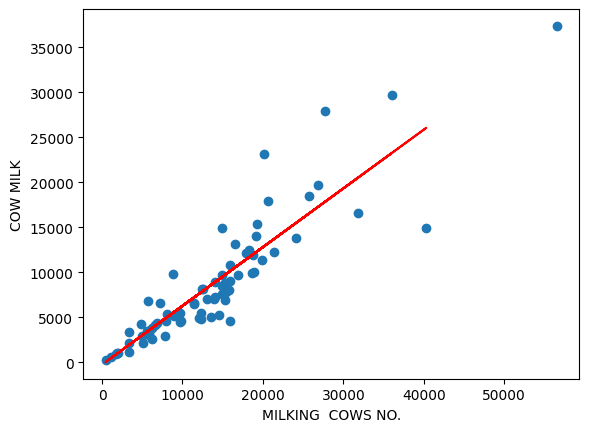

In [147]:
# Plotting the graph with most accurracy output line
plt.scatter(merged_df['MILKING  COWS NO.'],merged_df['COW MILK'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('MILKING  COWS NO.')
plt.ylabel('COW MILK')

In [148]:
from sklearn.metrics import mean_squared_error
y_pred=lr.predict(X_test)
mean_squared_error(y_test,y_pred)

4447678.646107301